# Name : Sandhana Chavan

# #GRIPJUNE2021

# Task by TSF @GRIP Foundation

# Graduate Rotational Internship Program(GRIP) June 2021 batch
#Data science and Business Analytics

In [31]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy as spy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [32]:
dt=pd.read_csv(r"C:\Users\Sneha\Downloads\Iris.csv")

In [33]:
dt

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
dt.drop('Id',axis=1,inplace=True)
dt.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Getting info

In [35]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
dt.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# correlation between the features

In [37]:
dt.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Visualizations

<AxesSubplot:>

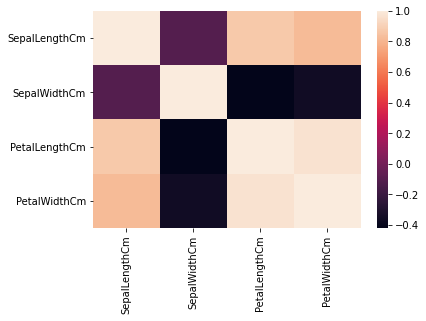

In [38]:
sns.heatmap(dt.corr())

c:\users\sneha\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

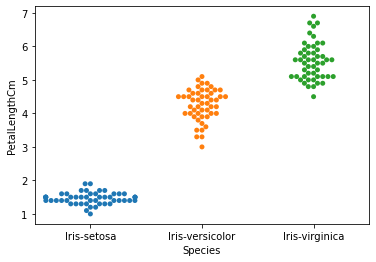

In [39]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=dt)

<AxesSubplot:>

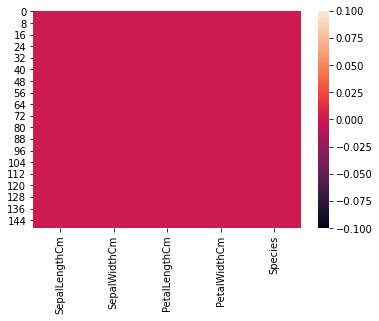

In [40]:
sns.heatmap(dt.isnull(),color='green')

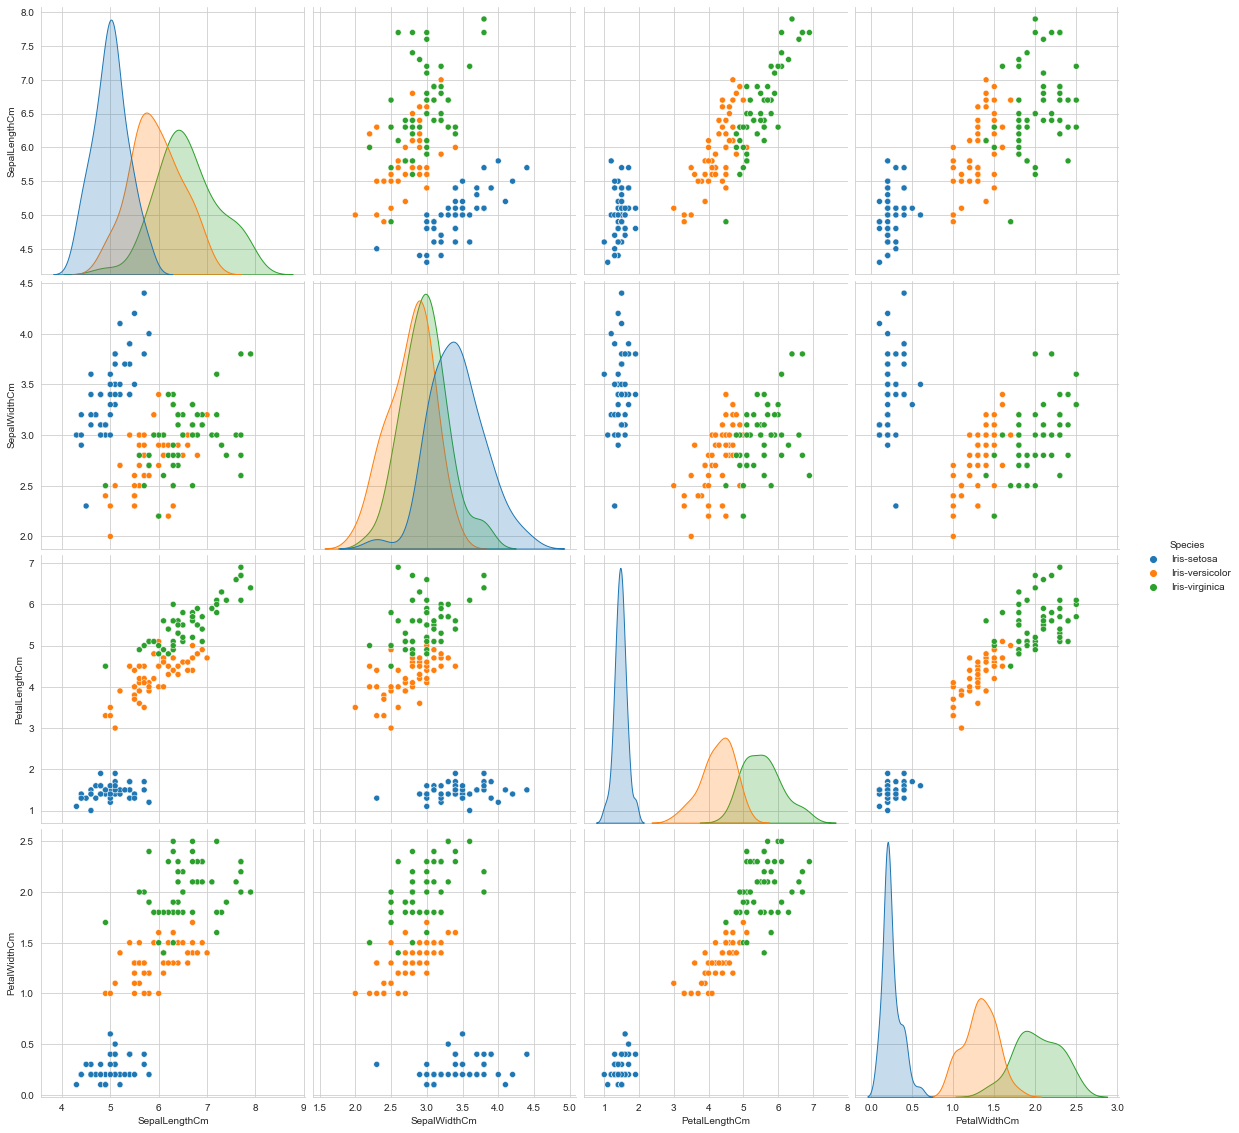

In [41]:
sns.set_style('whitegrid')
sns.pairplot(dt,hue='Species',height=4)
plt.show()

# modeling with scikit learn

In [44]:
x=dt.drop(['Species'],axis=1)
y=dt['Species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [46]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# train and test on the same dataset

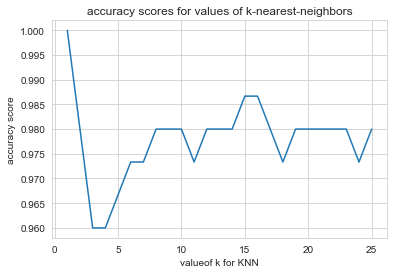

In [49]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y,y_pred))
plt.plot(k_range,scores)
plt.xlabel('valueof k for KNN')
plt.ylabel('accuracy score')
plt.title('accuracy scores for values of k-nearest-neighbors')
plt.show()

In [50]:
logreg = LogisticRegression()
logreg.fit(x,y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y,y_pred))

0.9733333333333334


# split the data set into a training set and testing set

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(90, 4)
(90,)
(60, 4)
(60,)


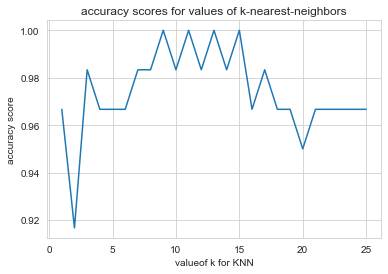

In [53]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range,scores)
plt.xlabel('valueof k for KNN')
plt.ylabel('accuracy score')
plt.title('accuracy scores for values of k-nearest-neighbors')
plt.show()

In [55]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9833333333333333


# choosing KNN model fo Iris Species Prediction with k=12

In [56]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x,y)
knn.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)

# Finding optimum number of Clusters for K-Means classificaion

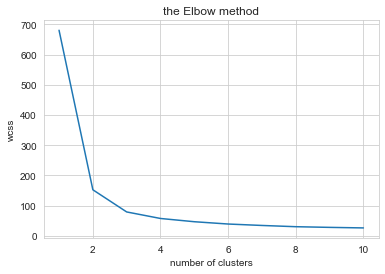

In [67]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter =300,n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('the Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

# the optimum clusters is where Elbow occurs


# from the above graph we choose the number of clusters as 3

In [69]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

# visualising the clusters

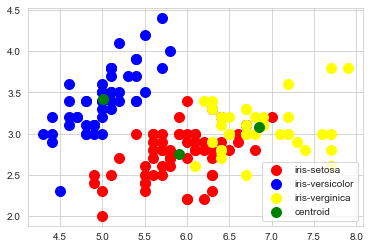

In [72]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c='red',label='iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c='blue',label='iris-versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c='yellow',label='iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label='centroid')
plt.legend()

In [73]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)
knn.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)